<a href="https://colab.research.google.com/github/Irving-Rafael/APK-MANAHUIA/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

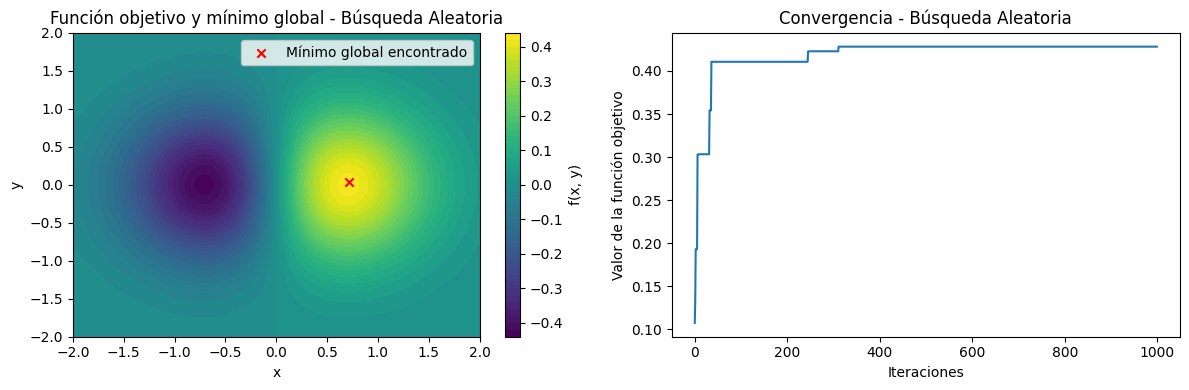

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las funciones objetivo y los métodos de búsqueda

# Definición de la primera función objetivo
def objective_function1(x, y):
    return x * np.exp(-x**2 - y**2)

# Definición de la segunda función objetivo
def objective_function2(x):
    return np.sum((x - 2)**2)

# Búsqueda Aleatoria
def random_search(objective_function, bounds, max_iterations):
    best_solution = None
    best_value = float('-inf')
    convergence = []

    for _ in range(max_iterations):
        solution = np.random.uniform(bounds[0], bounds[1], size=len(bounds))
        value = objective_function(*solution)
        if value > best_value:
            best_value = value
            best_solution = solution
        convergence.append(best_value)

    return best_solution, best_value, convergence

# Hill Climbing con Mutación Aleatoria
def hill_climbing(objective_function, bounds, max_iterations, step_size):
    current_solution = np.random.uniform(bounds[0], bounds[1], size=len(bounds))
    current_value = objective_function(*current_solution)
    convergence = [current_value]

    for _ in range(max_iterations):
        new_solution = current_solution + np.random.uniform(-step_size, step_size, size=len(bounds))
        new_solution = np.clip(new_solution, bounds[0], bounds[1])
        new_value = objective_function(*new_solution)

        if new_value > current_value:
            current_solution = new_solution
            current_value = new_value
        convergence.append(current_value)

    return current_solution, current_value, convergence

# Hill Climbing Adaptativo
def adaptive_hill_climbing(objective_function, bounds, max_iterations, initial_step_size, epsilon):
    current_solution = np.random.uniform(bounds[0], bounds[1], size=len(bounds))
    current_value = objective_function(*current_solution)
    convergence = [current_value]
    step_size = initial_step_size

    for _ in range(max_iterations):
        new_solution = current_solution + np.random.uniform(-step_size, step_size, size=len(bounds))
        new_solution = np.clip(new_solution, bounds[0], bounds[1])
        new_value = objective_function(*new_solution)

        if new_value > current_value:
            current_solution = new_solution
            current_value = new_value
            step_size *= 1.1
        else:
            step_size *= epsilon
        convergence.append(current_value)

    return current_solution, current_value, convergence

# Definición de los límites para las variables de decisión
bounds1 = (-2, 2)
bounds2 = (-10, 10)

# Parámetros comunes para los métodos de búsqueda
max_iterations = 1000
initial_step_size = 0.1
epsilon = 0.9

# Búsqueda Aleatoria
best_solution_random, best_value_random, convergence_random = random_search(objective_function1, bounds1, max_iterations)

# Hill Climbing con Mutación Aleatoria
best_solution_hill_climbing, best_value_hill_climbing, convergence_hill_climbing = hill_climbing(objective_function1, bounds1, max_iterations, initial_step_size)

# Hill Climbing Adaptativo
best_solution_adaptive, best_value_adaptive, convergence_adaptive = adaptive_hill_climbing(objective_function1, bounds1, max_iterations, initial_step_size, epsilon)

# Gráficas de la función objetivo y convergencia para Búsqueda Aleatoria
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = objective_function1(X, Y)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.scatter(best_solution_random[0], best_solution_random[1], color='red', marker='x', label='Mínimo global encontrado')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función objetivo y mínimo global - Búsqueda Aleatoria')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(convergence_random)
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la función objetivo')
plt.title('Convergencia - Búsqueda Aleatoria')

plt.tight_layout()
plt.show()
